# Explore here

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import set_random_seed
import shutil


2024-12-01 01:00:33.857861: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 01:00:34.123554: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 01:00:34.302397: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733014834.474675    7015 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733014834.541096    7015 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 01:00:35.131941: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
#STEP 1: Loading the dataset

## Defining the paths
train_dir = "data/train"
source_dir = "data/train/dog"

## Function to move cat images from 'dog' to 'cat' subfolder
def move_cat_images(source_dir, dog_subfolder, cat_subfolder):
    dog_dir = os.path.join(source_dir, dog_subfolder)
    cat_dir = os.path.join(source_dir, cat_subfolder)
    
    if not os.path.exists(dog_dir):
        print(f"Error: '{dog_subfolder}' subfolder does not exist.")
        return
    if not os.path.exists(cat_dir):
        os.makedirs(cat_dir)
        print(f"Created '{cat_subfolder}' subfolder.")

    ## Listing all files in the 'dog' subfolder
    files = os.listdir(dog_dir)

    ## Moving cat images from 'dog' to 'cat' subfolder
    for filename in files:
        if 'cat' in filename:
            src = os.path.join(dog_dir, filename)
            dst = os.path.join(cat_dir, filename)
            shutil.move(src, dst)

## Calling the function to move cat images
move_cat_images(train_dir, 'dog', 'cat')


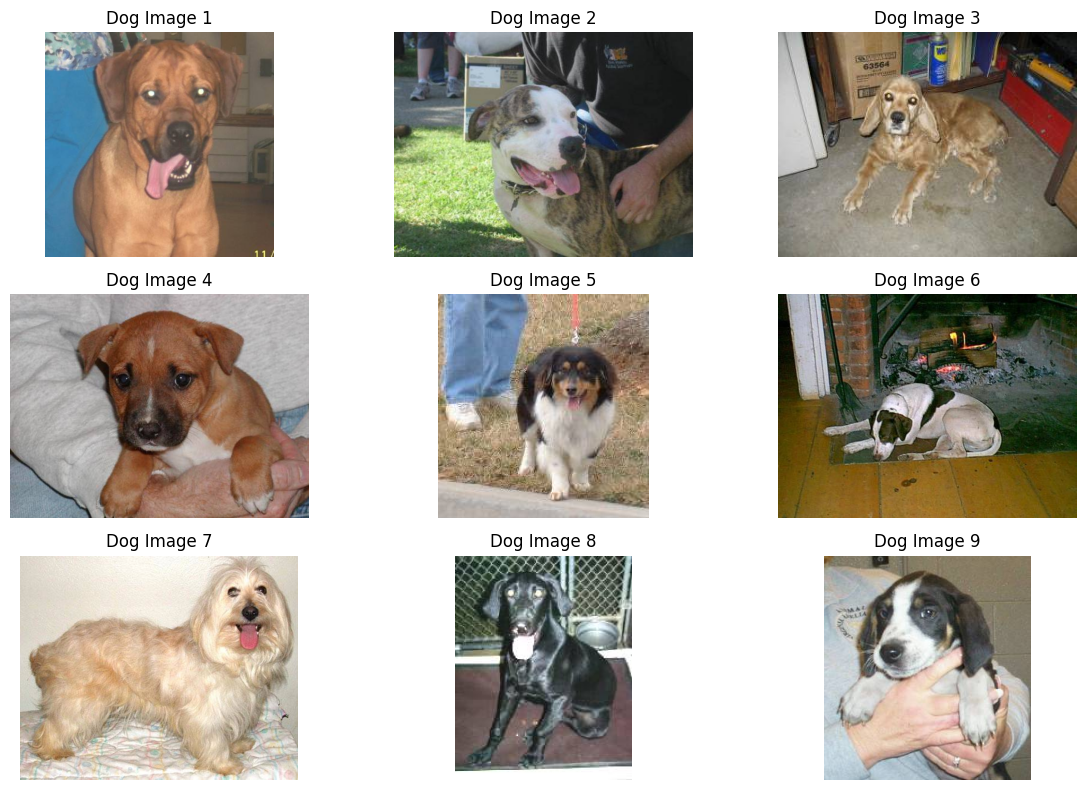

In [3]:
## Getting the first nine dog filenames
## Path to the dog subfolder
dog_dir = "data/train/dog"

## Getting a list of all files in the dog subfolder
dog_image_files = os.listdir(dog_dir)

## Selecting the first nine images
first_nine_dog_filenames = dog_image_files[:9]

# Plotting the first nine dog images
plt.figure(figsize=(12, 8))

for i, filename in enumerate(first_nine_dog_filenames):
    img_path = os.path.join(dog_dir, filename)
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i + 1) 
    plt.imshow(img)
    plt.title(f'Dog Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


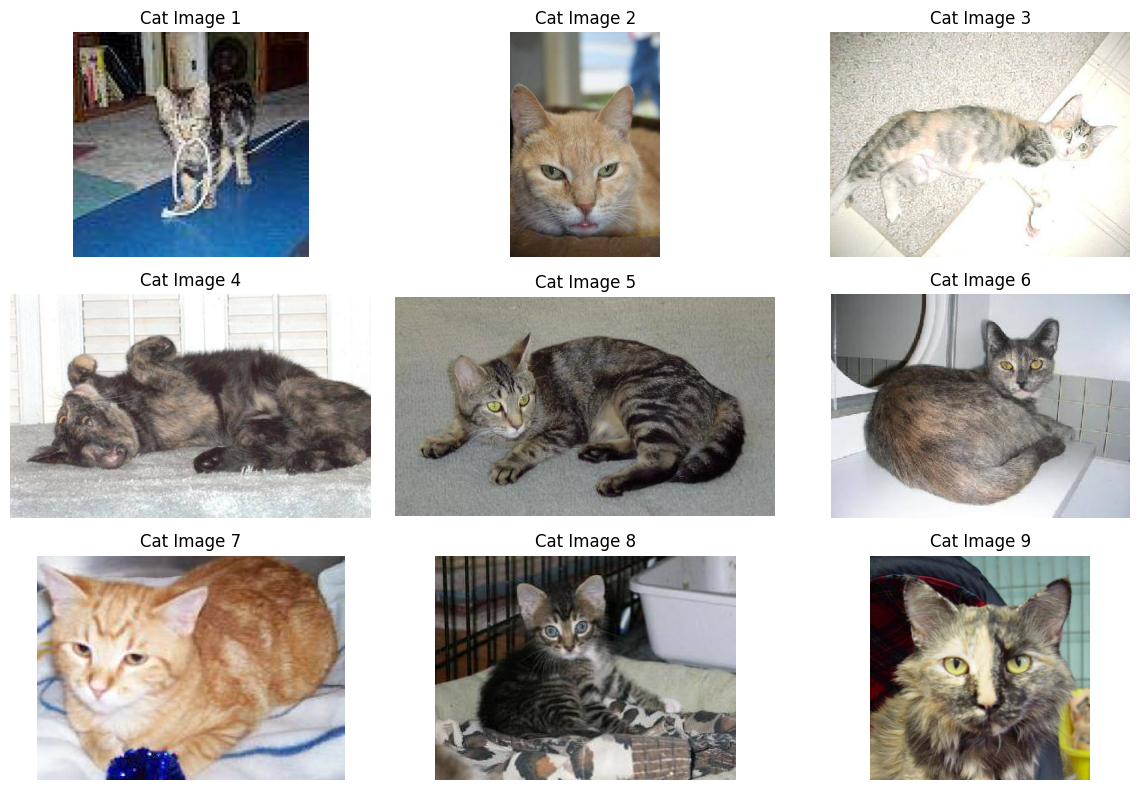

In [4]:
## Getting the first nine cat filenames
## Path to the cat subfolder
cat_dir = "data/train/cat"

## Getting a list of all files in the cat subfolder
cat_image_files = os.listdir(cat_dir)

## Selecting the first nine images 
first_nine_cat_filenames = cat_image_files[:9]

## Plotting the first nine cat images
plt.figure(figsize=(12, 8))

for i, filename in enumerate(first_nine_cat_filenames):
    img_path = os.path.join(cat_dir, filename)
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i + 1) 
    plt.imshow(img)
    plt.title(f'Cat Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
## Creating an ImageDataGenerator object for training and test data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Paths to train and test directories
train_dir = "data/train"
test_dir = "data/test"

## Initializing ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Creating training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    classes = ["dog", "cat"]
)

## Generating test data from the test folder
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200)
)

Found 102 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [6]:
#STEP 3: Building an ANN model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

## Moving the Data Through the Neural Network
model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

## Moving the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/home/codespace/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-01 01:00:40.631164: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2024-12-01 01:00:40.980811: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-12-01 01:00:41.436106: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-12-01 01:00:41.573076: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-

In [7]:
## Compiling the model
from keras.optimizers import Adam
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model

<Sequential name=sequential, built=True>

In [8]:
## Training the Model
model.fit(train_generator, epochs = 1)

/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 111s 33s/step - accuracy: 0.4602 - loss: 0.6959


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
The image is a cat


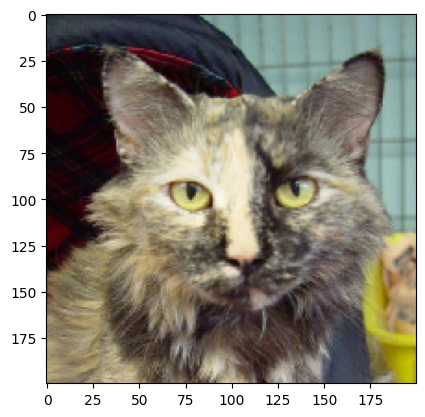

In [9]:
## ANN model prediction
from keras.preprocessing import image
from keras.models import load_model
import os

## Randomly select a file from the data/test directory
test_dir = 'data/test'
test_files = os.listdir(test_dir)
random_index = np.random.randint(len(test_files))
random_file = test_files[random_index]
random_file_path = os.path.join(test_dir, random_file)

image_path = random_file_path

## Loading the image with the target size the model expects 
img = image.load_img(img_path, target_size=(200, 200))

## Converting the image to a numpy array
img_array = image.img_to_array(img)

## Expanding dimensions to match the shape of model input 
img_array = np.expand_dims(img_array, axis=0)

## Normalizing the image (1/255)
img_array /= 255.0

## Predicting the class of the image
prediction = model.predict(img_array)

## Visualizing the predicted class
plt.imshow(img)

## Binary classification with the output as [probability_of_cat, probability_of_dog]
if prediction[0][0] > prediction[0][1]:
    print("The image is a cat")
else:
    print("The image is a dog")


The predicted result is cat, that corresponds to the image

In [10]:
#STEP 4: Saving the model
model.save("keras_200x200-1_42.keras")